<a href="https://colab.research.google.com/github/shastraOfTrading/Demand-Supply-Identification/blob/main/Demand_Supply_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install mpl_finance
!pip install mplfinance


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 3.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import yfinance
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 7]

plt.rc('font', size=14)

[*********************100%***********************]  1 of 1 completed


Demand Zones: [7380.14990234375, 7994.0498046875, 8203.400390625, 8080.0]
Supply Zones: [7459.9501953125, 8255.25, 8099.35009765625]


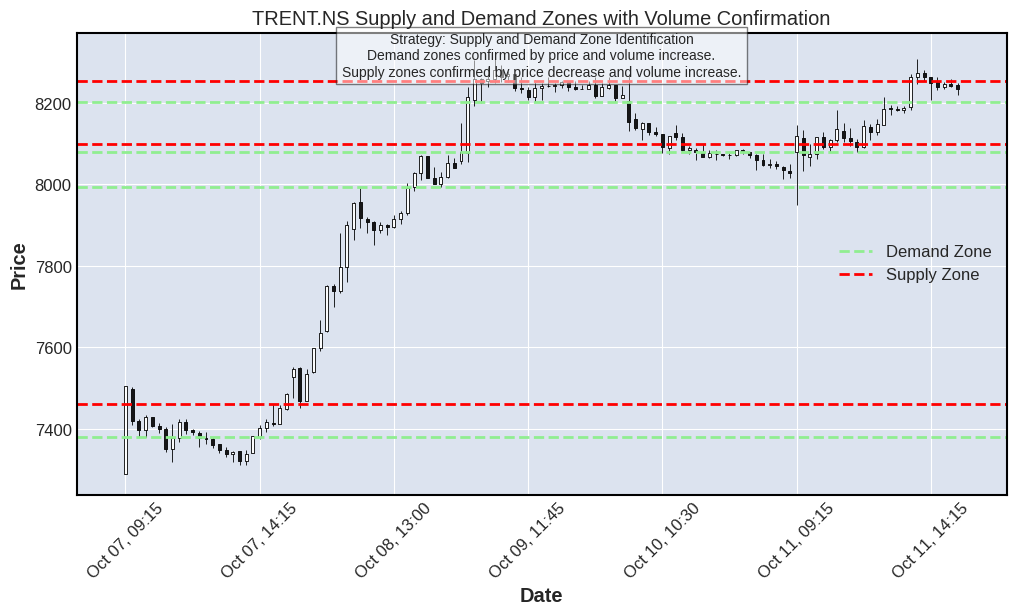

In [12]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf

# Download historical data
ticker = 'TRENT.NS'
df = yf.download(ticker, start='2024-10-07', end='2024-10-14', interval='15m')

# Function to identify demand and supply zones with volume confirmation
def identify_zones(df, threshold=0.01):
    demand_zones = []
    supply_zones = []

    for i in range(1, len(df) - 1):
        # Check for increasing volume
        volume_increase = df['Volume'].iloc[i] > df['Volume'].iloc[i - 1]

        # Identify demand zone
        if (df['Low'].iloc[i] < df['Low'].iloc[i - 1] and
            df['Low'].iloc[i] < df['Low'].iloc[i + 1]):
            demand_price = df['Low'].iloc[i]
            if volume_increase and df['Close'].iloc[i] > df['Close'].iloc[i - 1]:  # Price increase
                if not any(np.isclose(demand_price, zone, atol=demand_price * threshold) for zone in demand_zones):
                    demand_zones.append(demand_price)

        # Identify supply zone
        if (df['High'].iloc[i] > df['High'].iloc[i - 1] and
            df['High'].iloc[i] > df['High'].iloc[i + 1]):
            supply_price = df['High'].iloc[i]
            if volume_increase and df['Close'].iloc[i] < df['Close'].iloc[i - 1]:  # Price decrease
                if not any(np.isclose(supply_price, zone, atol=supply_price * threshold) for zone in supply_zones):
                    supply_zones.append(supply_price)

    return demand_zones, supply_zones

# Identify zones
demand_zones, supply_zones = identify_zones(df)

# Print identified zones
print("Demand Zones:", demand_zones)
print("Supply Zones:", supply_zones)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Plot candlestick chart
mpf.plot(df, type='candle', ax=ax, volume=False)

# Add demand zones (light green)
for zone in demand_zones:
    ax.axhline(y=zone, color='lightgreen', linestyle='--', label='Demand Zone' if demand_zones.index(zone) == 0 else "")

# Add supply zones (red)
for zone in supply_zones:
    ax.axhline(y=zone, color='red', linestyle='--', label='Supply Zone' if supply_zones.index(zone) == 0 else "")

# Set labels and title
ax.set_title(f"{ticker} Supply and Demand Zones with Volume Confirmation")
ax.set_xlabel('Date')
ax.set_ylabel('Price')

# Add strategy description
strategy_text = ("Strategy: Supply and Demand Zone Identification\n"
                 "Demand zones confirmed by price and volume increase.\n"
                 "Supply zones confirmed by price decrease and volume increase.")
plt.text(0.5, 0.95, strategy_text, horizontalalignment='center', verticalalignment='center',
         transform=ax.transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

# Show legend
ax.legend()

# Show plot
plt.show()


In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-10-07,7307.200195,7503.899902,7284.0,7449.500000,7449.500000,854385
2024-10-08,7520.000000,8073.399902,7451.0,8041.950195,8041.950195,2278240
2024-10-09,8089.000000,8322.200195,8035.0,8220.849609,8220.849609,1260784
2024-10-10,8200.000000,8270.950195,8012.0,8028.850098,8028.850098,606292
2024-10-11,8069.000000,8308.799805,7950.0,8234.950195,8234.950195,800644


from matplotlib import pyplot as plt
_df_0['Open'].plot(kind='hist', bins=20, title='Open')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['High'].plot(kind='hist', bins=20, title='High')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Low'].plot(kind='hist', bins=20, title='Low')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Close'].plot(kind='hist', bins=20, title='Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Open', y='High', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='High', y='Low', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Low', y='Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Close', y='Adj Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Open']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Open')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['High']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('High')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Low']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Low')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Close']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Close')

from matplotlib import pyplot as plt
_df_12['Open'].plot(kind='line', figsize=(8, 4), title='Open')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['High'].plot(kind='line', figsize=(8, 4), title='High')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Low'].plot(kind='line', figsize=(8, 4), title='Low')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df['Date'] = pd.to_datetime(df.index)
df['Date'] = df['Date'].apply(mpl_dates.date2num)

df = df.loc[:,['Date', 'Open', 'High', 'Low', 'Adj Close']]

In [ ]:
def isSupport(df, i):
    # Support if the current low is lower than previous and next lows
    return (df['Low'].iloc[i] < df['Low'].iloc[i - 1] and
            df['Low'].iloc[i] < df['Low'].iloc[i + 1])

def isResistance(df, i):
    # Resistance if the current high is higher than previous and next highs
    return (df['High'].iloc[i] > df['High'].iloc[i - 1] and
            df['High'].iloc[i] > df['High'].iloc[i + 1])

# Lists to hold support and resistance levels
support_levels = []
resistance_levels = []

# Loop through the DataFrame to find support and resistance levels
for i in range(2, df.shape[0] - 2):
    if isSupport(df, i):
        support_levels.append((df.index[i], df['Low'].iloc[i]))

    if isResistance(df, i):
        resistance_levels.append((df.index[i], df['High'].iloc[i]))

# Print the levels found
print("Support Levels:")
for level in support_levels:
    print(f"Date: {level[0]}, Support Level: {level[1]}")

print("\nResistance Levels:")
for level in resistance_levels:
    print(f"Date: {level[0]}, Resistance Level: {level[1]}")

Support Levels:

Resistance Levels:
Date: 2024-10-09 00:00:00, Resistance Level: 8322.2001953125


In [ ]:
levels = []
for i in range(2, df.shape[0] - 2):
    # Check for support
    support = (df['Low'].iloc[i] < df['Low'].iloc[i - 1] and
               df['Low'].iloc[i] < df['Low'].iloc[i + 1])

    # Check for resistance
    resistance = (df['High'].iloc[i] > df['High'].iloc[i - 1] and
                  df['High'].iloc[i] > df['High'].iloc[i + 1] and
                  df['High'].iloc[i + 1] > df['High'].iloc[i + 2] and
                  df['High'].iloc[i - 1] > df['High'].iloc[i - 2])

    if support:
        levels.append((i, df['Low'].iloc[i]))
    elif resistance:
        levels.append((i, df['High'].iloc[i]))

# Now you can use the levels list as needed
print(levels)


[]


In [ ]:
def plot_all():
  fig, ax = plt.subplots()

  candlestick_ohlc(ax,df.values,width=0.6, \
                   colorup='green', colordown='red', alpha=0.8)

  date_format = mpl_dates.DateFormatter('%d %b %Y')
  ax.xaxis.set_major_formatter(date_format)
  fig.autofmt_xdate()

  fig.tight_layout()

  for level in levels:
    plt.hlines(level[1],xmin=df['Date'][level[0]],\
               xmax=max(df['Date']),colors='blue')
  fig.show()

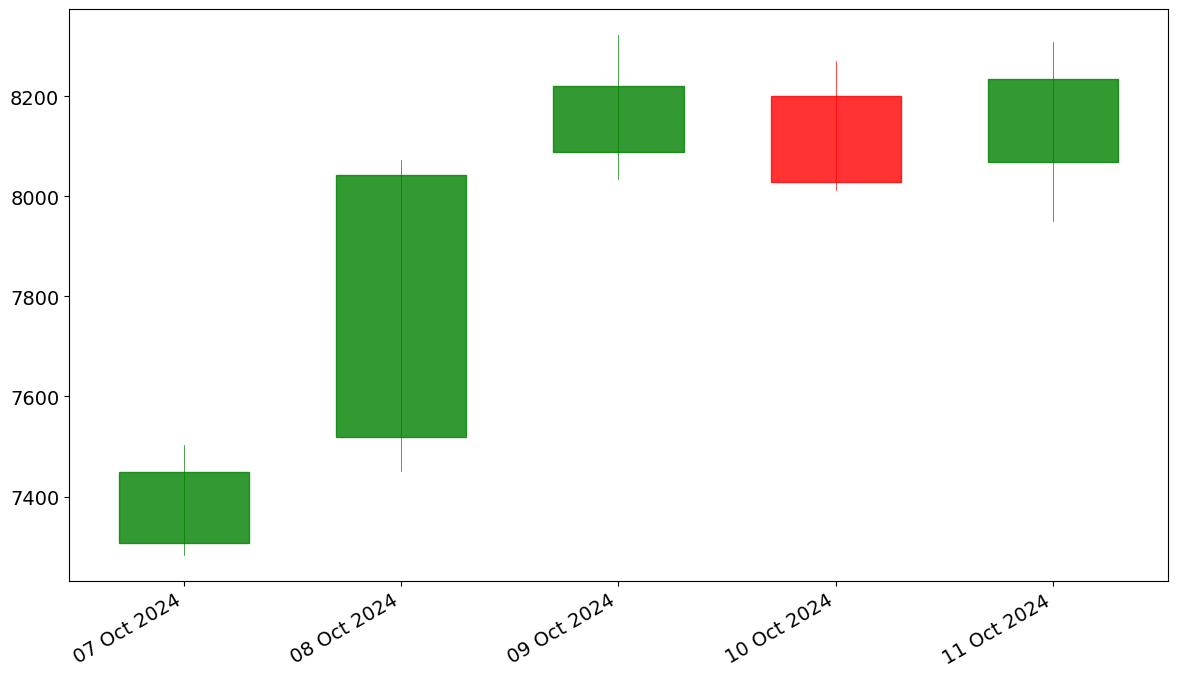

In [ ]:
plot_all()


In [ ]:
s =  np.mean(df['High'] - df['Low'])


In [ ]:
def isFarFromLevel(l):
  return np.sum([abs(l-x) < s  for x in levels]) == 0

In [ ]:
levels = []
for i in range(2, df.shape[0] - 2):
    # Check for support
    support = (df['Low'].iloc[i] < df['Low'].iloc[i - 1] and
               df['Low'].iloc[i] < df['Low'].iloc[i + 1])

    # Check for resistance
    resistance = (df['High'].iloc[i] > df['High'].iloc[i - 1] and
                  df['High'].iloc[i] > df['High'].iloc[i + 1] and
                  df['High'].iloc[i + 1] > df['High'].iloc[i + 2] and
                  df['High'].iloc[i - 1] > df['High'].iloc[i - 2])

    if support:
        l = df['Low'].iloc[i]  # Use .iloc for positional indexing
        if isFarFromLevel(l):
            levels.append((i, l))

    elif resistance:
        l = df['High'].iloc[i]  # Use .iloc for positional indexing
        if isFarFromLevel(l):
            levels.append((i, l))

# Now you can use the levels list as needed
print(levels)


[]


In [ ]:
levels

[]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


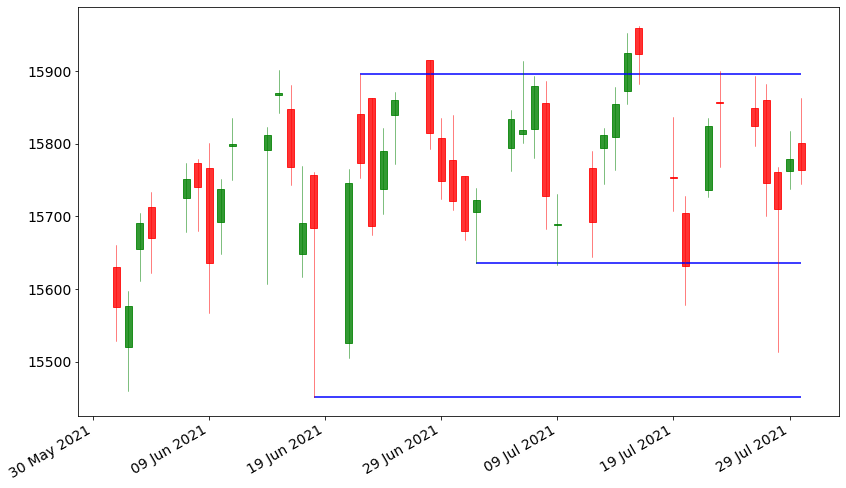

In [ ]:
plot_all()
